In [ ]:
!git clone https://github.com/openvinotoolkit/openvino
!cd openvino/model-optimizer/install_prerequisites/ && ./install_prerequisites.sh tf2

Cloning into 'openvino'...
remote: Enumerating objects: 366298, done.
remote: Counting objects: 100% (918/918), done.
remote: Compressing objects: 100% (771/771), done.
remote: Total 366298 (delta 342), reused 409 (delta 141), pack-reused 365380
Receiving objects: 100% (366298/366298), 279.39 MiB | 14.29 MiB/s, done.
Resolving deltas: 100% (282065/282065), done.
Updating files: 100% (17084/17084), done.
Filtering content: 100% (799/799), 261.23 MiB | 44.82 MiB/s, done.
/bin/bash: line 0: cd: openvino/model-optimizer/install_prerequisites/: No such file or directory


In [ ]:
!python3 -m pip install openvino-dev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 31.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.8/36.8 MB 18.1 MB/s eta 0:00:00
  Created wheel for jstyleson: filename=jstyleson-0.0.2-py3-none-any.whl size=2384 sha256=084568e435e2772e4c25f9ad54723969b8f93f09018c6e94175dd28f5fb1d69b
  Stored in directory: /root/.cache/pip/wheels/12/51/c6/a1e751db88203e11c6d9ffe4683ca3d8c14b1479639bec1006
Successfully built jstyleson
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [ ]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

#import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plb
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#load fashion MNIST dataset
fashion_mnist=keras.datasets.fashion_mnist
#load and preprocess data
(traind,trainl),(testd,testl)=fashion_mnist.load_data()
#printing details of the dataset
print("Train data:",traind.shape)
print("Test data:",testd.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train data: (60000, 28, 28)
Test data: (10000, 28, 28)


In [ ]:
model = keras.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='leaky_relu'))

# Flatten the feature maps
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
#compiling the model
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#training the model
history=model.fit(traind, trainl, epochs=15, batch_size=150, verbose=1, validation_data=(testd, testl))
#evaluating the model
test_loss,test_accuracy = model.evaluate(testd,testl,verbose = 0)
print("Test accuracy:",test_accuracy)

Epoch 1/15
400/400 [==============================] - 71s 169ms/step - loss: 0.7728 - accuracy: 0.7405 - val_loss: 0.4993 - val_accuracy: 0.8106
Epoch 2/15
400/400 [==============================] - 60s 151ms/step - loss: 0.4277 - accuracy: 0.8440 - val_loss: 0.3766 - val_accuracy: 0.8644
Epoch 3/15
400/400 [==============================] - 61s 153ms/step - loss: 0.3649 - accuracy: 0.8662 - val_loss: 0.3526 - val_accuracy: 0.8738
Epoch 4/15
400/400 [==============================] - 61s 152ms/step - loss: 0.3362 - accuracy: 0.8763 - val_loss: 0.3334 - val_accuracy: 0.8814
Epoch 5/15
400/400 [==============================] - 65s 163ms/step - loss: 0.3158 - accuracy: 0.8838 - val_loss: 0.3080 - val_accuracy: 0.8879
Epoch 6/15
400/400 [==============================] - 63s 158ms/step - loss: 0.2998 - accuracy: 0.8886 - val_loss: 0.3279 - val_accuracy: 0.8782
Epoch 7/15
400/400 [==============================] - 64s 160ms/step - loss: 0.2874 - accuracy: 0.8938 - val_loss: 0.2896 - val_ac

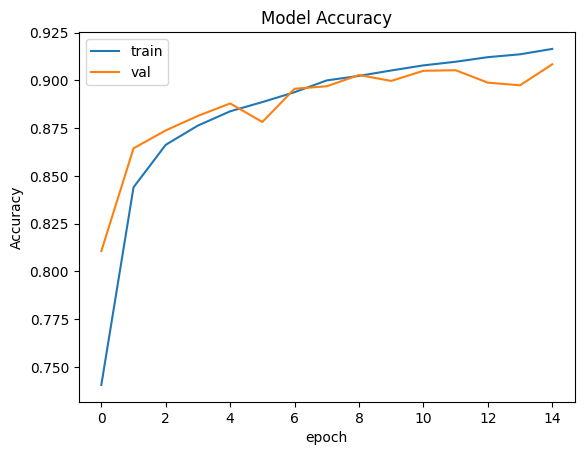

In [ ]:
# Accuracy vs Epoch plot
plb.plot(history.history['accuracy'])
plb.plot(history.history['val_accuracy'])
plb.title('Model Accuracy')
plb.ylabel('Accuracy')
plb.xlabel('epoch')
plb.legend(['train', 'val','test'], loc='upper left')
plb.show()

In [ ]:
# Make predictions
predictions = model.predict(testd)
predicted_labels=np.argmax(predictions, axis=1)
print("predictions:",predicted_labels)

313/313 [==============================] - 4s 14ms/step
predictions: [9 2 1 ... 8 1 5]


In [ ]:
model.save('model.h5')

In [ ]:
#printing the predictions
print("prediction  target")
for x in np.arange(50):
    print(predicted_labels[x],testl[x])

prediction  target
9 9
2 2
1 1
1 1
0 6
1 1
4 4
6 6
5 5
7 7
4 4
5 5
7 7
3 3
4 4
1 1
2 2
4 4
8 8
0 0
2 2
5 5
7 7
5 9
1 1
2 4
6 6
0 0
9 9
4 3
8 8
8 8
3 3
3 3
8 8
0 0
7 7
5 5
7 7
9 9
6 6
1 1
6 3
9 7
4 6
7 7
2 2
1 1
2 2
6 2


In [ ]:
cm = confusion_matrix(testl, predicted_labels)

# Calculate classification report
report = classification_report(testl, predicted_labels)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[844   4  15  23   5   2  99   0   8   0]
 [  0 982   1  14   1   0   0   0   2   0]
 [ 18   0 849   9  76   0  48   0   0   0]
 [  9   3  10 933  22   0  23   0   0   0]
 [  2   0  32  32 876   0  57   0   1   0]
 [  0   0   0   0   0 991   0   7   1   1]
 [ 99   0  85  27  87   0 698   0   4   0]
 [  0   0   0   0   0  11   0 965   0  24]
 [  0   0   2   5   2   3   2   0 985   1]
 [  1   0   0   0   0   7   0  31   0 961]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.85      0.85      1000
           3       0.89      0.93      0.91      1000
           4       0.82      0.88      0.85      1000
           5       0.98      0.99      0.98      1000
           6       0.75      0.70      0.72      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('model.h5')
tf.saved_model.save(model,'model')

In [ ]:
!mo --saved_model_dir model

[ INFO ] The model was converted to IR v11, the latest model format that corresponds to the source DL framework input/output format. While IR v11 is backwards compatible with OpenVINO Inference Engine API v1.0, please use API v2.0 (as of 2022.1) to take advantage of the latest improvements in IR v11.
Find more information about API v2.0 and IR v11 at https://docs.openvino.ai/2023.0/openvino_2_0_transition_guide.html
[ INFO ] IR generated by new TensorFlow Frontend is compatible only with API v2.0. Please make sure to use API v2.0.
Find more information about new TensorFlow Frontend at https://docs.openvino.ai/2023.0/openvino_docs_MO_DG_TensorFlow_Frontend.html
[ SUCCESS ] Generated IR version 11 model.
[ SUCCESS ] XML file: /content/saved_model.xml
[ SUCCESS ] BIN file: /content/saved_model.bin
